# Decision Tree from Scratch

In [352]:
# 必要モジュールの用意
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [353]:
train = np.array([[2.771244718,1.784783929,0],
    [1.728571309,1.169761413,0],
    [3.678319846,2.81281357,0],
    [3.961043357,2.61995032,0],
    [2.999208922,2.209014212,0],
    [7.497545867,3.162953546,1],
    [9.00220326,3.339047188,1],
    [7.444542326,0.476683375,1],
    [10.12493903,3.234550982,1],
    [6.642287351,3.319983761,1]])

In [354]:
train_df = pd.DataFrame(train)
train_df

,0,1,2
0,2.771245,1.784784,0.0
1,1.728571,1.169761,0.0
2,3.678320,2.812814,0.0
3,3.961043,2.619950,0.0
4,2.999209,2.209014,0.0
5,7.497546,3.162954,1.0
6,9.002203,3.339047,1.0
7,7.444542,0.476683,1.0
8,10.124939,3.234551,1.0
9,6.642287,3.319984,1.0


In [355]:
train_df = train_df.rename(columns={0: 'x0', 1: 'x1', 2: 'y'})
train_df

,x0,x1,y
0,2.771245,1.784784,0.0
1,1.728571,1.169761,0.0
2,3.678320,2.812814,0.0
3,3.961043,2.619950,0.0
4,2.999209,2.209014,0.0
5,7.497546,3.162954,1.0
6,9.002203,3.339047,1.0
7,7.444542,0.476683,1.0
8,10.124939,3.234551,1.0
9,6.642287,3.319984,1.0


In [356]:
train_df.to_csv('./to_csv_out.csv')

# 手で決定木をつくる

In [357]:
train_df_0 = train_df[train_df['y']==0]
train_df_1 = train_df[train_df['y']==1]

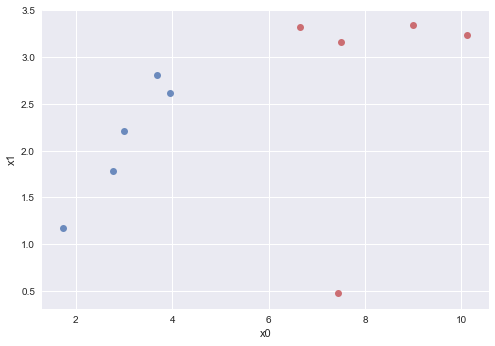

In [358]:
# 散布図
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="x0", y="x1", data=train_df_0, fit_reg=False, color="b")
ax = sns.regplot(x="x0", y="x1", data=train_df_1, fit_reg=False, color="r")


- グラフの点が、１つのデータに相当します。
- グラフの領域が、決定木のノードに相当します。
- グラフの中に引く太い仕切り線が、決定木の条件（x0<6など）に相当します。
- ノード内に書かれる番号は、グラフの領域に含まれている点番号に相当します。

## Root Nodesの作成

- ルートノードを作ります。
- 全領域に全点が含まれているので、0, 1, 2, 3, 4, 5, 6, 7, 8, 9となっています。
- なお、ランダムフォレストでは、通常は重複を許しランダムに選ぶらしい（例：5,1,1,3,7,2,5,0）。全部の点を使わず2/3程度の点だけを使う場合も多いらしい。

## 子ノード：分割線を決めます。

仮に、x1 > 2.209014で分けたとします。


２つの領域に分かれるので、子ノードを２つ作ります。


左の子ノードにx1 > 2.209014を満たす点を、右の子ノードにx1 > 2.209014を満たさない点を入れます。


左には
2,3,4,5,6,8,9


右には
0,1,7


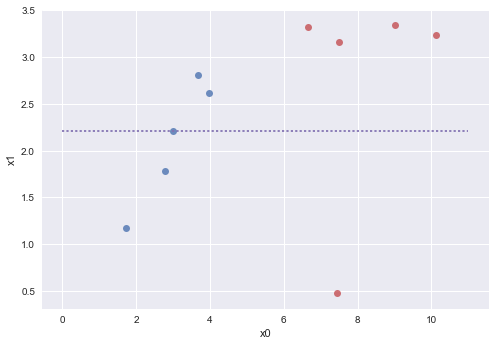

In [359]:
# 散布図
ax = sns.regplot(x="x0", y="x1", data=train_df_0, fit_reg=False, color="b")
ax = sns.regplot(x="x0", y="x1", data=train_df_1, fit_reg=False, color="r")
#plt.vlines(7.44454233, 0,2.20901421, "m", linestyle=":")
plt.hlines(2.209014, 0,11, "m", linestyle=":")

#plt.vlines(6.642287351, 0,4, "r", linestyle=":")
#plt.hlines(2.20901421, 0,11, "r", linestyle=":")

### 孫ノード

次は子ノードを見ていきます。
対象の領域はx1 > 2.209014を満たす、グラフの上の部分。
今回は分割する場所の候補は(2, 3, 4, 5, 6, 8, 9)だけになります。



X0>6.642287351というう対象領域を決めたとします。

左孫ノード
5,6,8,9



右孫ノード
2,3,4


と分けられます

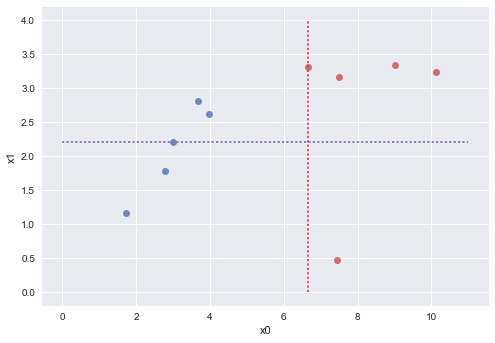

In [360]:
# 散布図
ax = sns.regplot(x="x0", y="x1", data=train_df_0, fit_reg=False, color="b")
ax = sns.regplot(x="x0", y="x1", data=train_df_1, fit_reg=False, color="r")
#plt.vlines(7.44454233, 0,2.20901421, "m", linestyle=":")
plt.hlines(2.209014, 0,11, "m", linestyle=":")

plt.vlines(6.642287351, 0,4, "r", linestyle=":")
#plt.hlines(2.20901421, 0,11, "r", linestyle=":")

後は繰り返しです。次のノードに行き、領域内の点が全て趣味（青）か全てプロ（赤）になったら、もう領域を分割しても無意味なので、終了です。このノードは葉となります。


# ベストな分け方はどう決めるべきか

上記の方法だと、全てマニュアルで適当に線を引いたにすぎません。

分類の場合は、ジニ係数を使う方法とエントロピーを使う方法が知られています。

ここではジニ係数を用いて、係数の値が最小となる閾値を求めるようにします。

この章の最後には、閾値を表します。



## 分類の割合計算の計算を行う

In [383]:
#行のなかで該当分類がどれくらいあるか数を数える
def uniquecounts(rows):
   results={}
   for row in rows:
      # 結果を最後のカラム
      rr=row[len(row)-1]
      
      if rr not in results: results[rr]=0
      results[rr]+=1
   return results

In [384]:
uniquecounts(train)

{0.0: 5, 1.0: 5}

全体のデータから０と１と分類されているものが、５つずつあることが確認できました。

## Giniを計算する

In [385]:
#カウント数を使って、P1の割合を決めて、その二乗をP2として、その総和をimpurityとして、1から引くとGini

def gini(rows):
    total=len(rows)
    #print(total)          
    counts=uniquecounts(rows)
    #print(counts)         
    impurity =0
    for i1 in counts:
        p1=counts[i1]/total
        #print (p1)   

        for i2 in counts:
          if i1==i2: continue
          p2=p1*p1   
          #print ((p2) 
          impurity += p2      
        #print ((counts[i1]))              
        #print ((counts[i2])) 
    gini = 1 - impurity
    return gini

In [386]:
gini(train)

0.5

カウント数を使って、P1の割合を決めて、その二乗をP2として、その総和をimpurityとして、1から引くと0.5となったことがわかりました。
もともと、分類ごとに、0.5ずつだったものを２乗して足している（0.25+0.25)ので、手計算とも合っています。

ここからは、一般に、閾値に与えられたデータを用いる方法がありますが、

下記においては、元のデータの行をi行(全部の行数まで)無くしたパターンを作成し、最後に全データが載っているものを加えた全パターンを作成し、そのどれがGini係数が低くなったかを確認する方法をとりたいと思います。

In [387]:
#全パターンを作成します（事前に行数分の範囲を０から(0,1), (0,1,2)、、、と作成し、aとしてリストパターンを作呼んで
#そのパターンを全てのデータで抜いていき、残ったデータをnew_trainと呼んで、全パターンと呼んでいます

def pattern_making(rows):

    new_trains = []
    j = 0
    for j in range(11):
        a=list(range(0,j))
        #print(a)

        for i in range(len(rows)):
            new_train = np.delete(rows, a, 0)
            new_trains.append(new_train)
        #print(new_trains)
    return new_trains

In [388]:
pattern_making(train)

[array([[ 2.77124472,  1.78478393,  0.        ],
        [ 1.72857131,  1.16976141,  0.        ],
        [ 3.67831985,  2.81281357,  0.        ],
        [ 3.96104336,  2.61995032,  0.        ],
        [ 2.99920892,  2.20901421,  0.        ],
        [ 7.49754587,  3.16295355,  1.        ],
        [ 9.00220326,  3.33904719,  1.        ],
        [ 7.44454233,  0.47668338,  1.        ],
        [10.12493903,  3.23455098,  1.        ],
        [ 6.64228735,  3.31998376,  1.        ]]),
 array([[ 2.77124472,  1.78478393,  0.        ],
        [ 1.72857131,  1.16976141,  0.        ],
        [ 3.67831985,  2.81281357,  0.        ],
        [ 3.96104336,  2.61995032,  0.        ],
        [ 2.99920892,  2.20901421,  0.        ],
        [ 7.49754587,  3.16295355,  1.        ],
        [ 9.00220326,  3.33904719,  1.        ],
        [ 7.44454233,  0.47668338,  1.        ],
        [10.12493903,  3.23455098,  1.        ],
        [ 6.64228735,  3.31998376,  1.        ]]),
 array([[ 2.7712

In [395]:
#パターンごとに、gini係数を計算してリストに吐き出す
def jimmy(new_trains):
    jimmy = []
    for k in range(0, 100):
        calc_gini = gini(new_trains[k])
        jimmy.append(calc_gini)
    return jimmy

In [396]:
jimmy(new_trains)

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.49382716049382713,
 0.49382716049382713,
 0.49382716049382713,
 0.49382716049382713,
 0.49382716049382713,
 0.49382716049382713,
 0.49382716049382713,
 0.49382716049382713,
 0.49382716049382713,
 0.49382716049382713,
 0.46875,
 0.46875,
 0.46875,
 0.46875,
 0.46875,
 0.46875,
 0.46875,
 0.46875,
 0.46875,
 0.46875,
 0.40816326530612246,
 0.40816326530612246,
 0.40816326530612246,
 0.40816326530612246,
 0.40816326530612246,
 0.40816326530612246,
 0.40816326530612246,
 0.40816326530612246,
 0.40816326530612246,
 0.40816326530612246,
 0.2777777777777777,
 0.2777777777777777,
 0.2777777777777777,
 0.2777777777777777,
 0.2777777777777777,
 0.2777777777777777,
 0.2777777777777777,
 0.2777777777777777,
 0.2777777777777777,
 0.2777777777777777,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1

## 最低のGiniの値から、閾値を求める

In [401]:
find_min = np.array(jimmy(new_trains))

In [402]:
np.min(find_min)

0.2777777777777777

In [323]:
threshold = new_trains[40]
threshold

array([[ 2.99920892,  2.20901421,  0.        ],
       [ 7.49754587,  3.16295355,  1.        ],
       [ 9.00220326,  3.33904719,  1.        ],
       [ 7.44454233,  0.47668338,  1.        ],
       [10.12493903,  3.23455098,  1.        ],
       [ 6.64228735,  3.31998376,  1.        ]])

In [196]:
#選ばれた要素の中のminを閾値と呼ぶ
print(np.min(threshold, axis=0))

[2.99920892 0.47668338 0.        ]


## 得られた閾値をプロットします

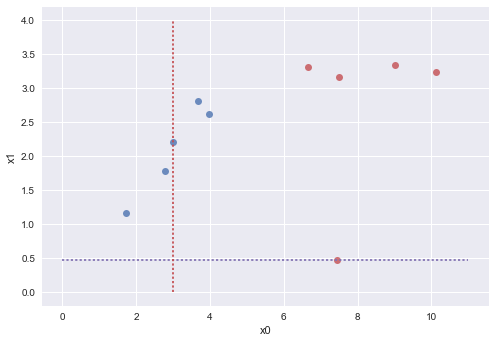

In [266]:
# 散布図
ax = sns.regplot(x="x0", y="x1", data=train_df_0, fit_reg=False, color="b")
ax = sns.regplot(x="x0", y="x1", data=train_df_1, fit_reg=False, color="r")
#plt.vlines(7.44454233, 0,2.20901421, "m", linestyle=":")
plt.hlines(0.47668338, 0,11, "m", linestyle=":")

plt.vlines(2.99920892, 0,4, "r", linestyle=":")
#plt.hlines(2.20901421, 0,11, "r", linestyle=":")

#  自学自習用

In [313]:
new_trains = []
j = 0
for j in range(11):
    a=list(range(0,j))
    #print(a)

    for i in range(len(train)):
        new_train = np.delete(train, a, 0)
        new_trains.append(new_train)
    #print(new_trains)
print(new_trains)

In [403]:
j = 0
for j in range(11):
    a=list(range(0,j))
    print(a)

[]
[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [406]:
l = 0
for l in range(11):
    b=list(range(0,l+1))
    print(b)

[0]
[0, 1]
[0, 1, 2]
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [115]:
train

array([[ 2.77124472,  1.78478393,  0.        ],
       [ 1.72857131,  1.16976141,  0.        ],
       [ 3.67831985,  2.81281357,  0.        ],
       [ 3.96104336,  2.61995032,  0.        ],
       [ 2.99920892,  2.20901421,  0.        ],
       [ 7.49754587,  3.16295355,  1.        ],
       [ 9.00220326,  3.33904719,  1.        ],
       [ 7.44454233,  0.47668338,  1.        ],
       [10.12493903,  3.23455098,  1.        ],
       [ 6.64228735,  3.31998376,  1.        ]])

In [114]:
new_train = np.delete(train, [0], 0)
new_train

array([[ 1.72857131,  1.16976141,  0.        ],
       [ 3.67831985,  2.81281357,  0.        ],
       [ 3.96104336,  2.61995032,  0.        ],
       [ 2.99920892,  2.20901421,  0.        ],
       [ 7.49754587,  3.16295355,  1.        ],
       [ 9.00220326,  3.33904719,  1.        ],
       [ 7.44454233,  0.47668338,  1.        ],
       [10.12493903,  3.23455098,  1.        ],
       [ 6.64228735,  3.31998376,  1.        ]])

In [117]:
new_train = np.delete(train, [0, 1], 0)
new_train

array([[ 3.67831985,  2.81281357,  0.        ],
       [ 3.96104336,  2.61995032,  0.        ],
       [ 2.99920892,  2.20901421,  0.        ],
       [ 7.49754587,  3.16295355,  1.        ],
       [ 9.00220326,  3.33904719,  1.        ],
       [ 7.44454233,  0.47668338,  1.        ],
       [10.12493903,  3.23455098,  1.        ],
       [ 6.64228735,  3.31998376,  1.        ]])

In [152]:
new_trains = []
for i in range(len(train)):
    new_train = np.delete(train, [i], 0)
    new_trains.append(new_train)
print(new_trains)


[array([[ 1.72857131,  1.16976141,  0.        ],
       [ 3.67831985,  2.81281357,  0.        ],
       [ 3.96104336,  2.61995032,  0.        ],
       [ 2.99920892,  2.20901421,  0.        ],
       [ 7.49754587,  3.16295355,  1.        ],
       [ 9.00220326,  3.33904719,  1.        ],
       [ 7.44454233,  0.47668338,  1.        ],
       [10.12493903,  3.23455098,  1.        ],
       [ 6.64228735,  3.31998376,  1.        ]]), array([[ 2.77124472,  1.78478393,  0.        ],
       [ 3.67831985,  2.81281357,  0.        ],
       [ 3.96104336,  2.61995032,  0.        ],
       [ 2.99920892,  2.20901421,  0.        ],
       [ 7.49754587,  3.16295355,  1.        ],
       [ 9.00220326,  3.33904719,  1.        ],
       [ 7.44454233,  0.47668338,  1.        ],
       [10.12493903,  3.23455098,  1.        ],
       [ 6.64228735,  3.31998376,  1.        ]]), array([[ 2.77124472,  1.78478393,  0.        ],
       [ 1.72857131,  1.16976141,  0.        ],
       [ 3.96104336,  2.61995032,  

In [130]:
new_trains = []
for i in range(len(train)):
    new_train = np.delete(train, [i,i+1], 0)
    new_trains.append(new_train)
#print(new_trains)
new_trains[9]

/Users/szkhome/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 2.77124472,  1.78478393,  0.        ],
       [ 1.72857131,  1.16976141,  0.        ],
       [ 3.67831985,  2.81281357,  0.        ],
       [ 3.96104336,  2.61995032,  0.        ],
       [ 2.99920892,  2.20901421,  0.        ],
       [ 7.49754587,  3.16295355,  1.        ],
       [ 9.00220326,  3.33904719,  1.        ],
       [ 7.44454233,  0.47668338,  1.        ],
       [10.12493903,  3.23455098,  1.        ]])

In [ ]:
new_trains = []
j = 0
for j in range(11):
    a=list(range(0,j))
    #print(a)

    for i in range(len(train)):
        new_train = np.delete(train, a, 0)
        new_trains.append(new_train)
    #print(new_trains)